# The purpose of this notebook is to give an example of the usage of the factorization method used in some of my works.

### After factorization, a simple total moment sum rule analysis along with a first moment sum rule analysis is performed. Some of the fitting utilities, in particular the unceratinty determination, are also shown.

Steps like absorption corrections, normalization, and others are skipped as they are shown in other notebooks. The definition of the factorization itself may be found in my disseration.



/home/tom/anaconda3/envs/mantid/lib/python3.6/site-packages/h5py/__init__.py:40: UserWarning: h5py is running against HDF5 1.10.0 when it was built against 1.10.6, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


 Material.formula_weight=(val)

######################

a = 5.3489 Ang
b = 9.2431 Ang
c = 4.8734 Ang
alpha = 90.0 Ang
beta = 111.44 Ang
gamma = 90.0 Ang
C 1 2/m 1
Space group: C 1 2/m 1
Unit Cell Volume =224.27
Formula weight = 100.0
Formula units per unit cell = 2
h3liir2o6.cif imported successfully.

###################### 



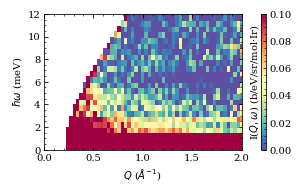

In [1]:
# First, import a dataset.
import thpyutils.material as material
import thpyutils.neutron.mdwrapper as mdwrapper
import matplotlib.pyplot as plt
from mantid.simpleapi import  *
import matplotlib
%matplotlib inline

# Specification of the necessary files.
ciffile = 'h3liir2o6.cif'
filename = '30_4K_SEQ_mag.nxs'

hlio = material.Material(cif_file = ciffile)
hlio_seq = mdwrapper.MDwrapper(name='HLIO_testing',filename=filename)

#Specify various measurement properties
hlio_seq.instrument='SEQ'
hlio_seq.temperature = 200.0 #in K
hlio_seq.Ei=30.0
hlio_seq.field = 0.0 # in T
#Import the nxspe file by spcifying binning params
Qslice = [0,4.0,0.05]
Eslice = [-20,25,0.5]
#Note in this case this is not an NXSPE file but instead a pre-binned nxs file containing an MDHistoworkspace.
hlioMagMD = LoadMD(filename)
hlio_seq.mdhisto = hlioMagMD
fig,ax = plt.subplots(1,1,figsize=(3.54,2.5),subplot_kw={'projection':'mantid'})
im = hlio_seq.colorplot(fig,ax,vmin=0.00,vmax=0.1,cmap='Spectral_r')
ax.set_xlim(0,2.0)
ax.set_ylim(0,12)
#Just as an example, we will make a colorbar here. It will not be done in the future for brevity.
l,b,w,h=ax.get_position().bounds
cax = fig.add_axes([w+0.2,b,0.02,h])
labelstr='I($Q,\omega$) (b/eV/sr/mol$\cdot$Ir)'
cbar = plt.colorbar(im,orientation='vertical',cax=cax)
cax.text(-2.5,0.5,labelstr,transform=cax.transAxes,horizontalalignment='left',verticalalignment='center',rotation=90)
cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))



Evaluating Uncertainty for param_0


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Insufficient number of points under max chisqr. Recursively iterating.
Good points: 18/20


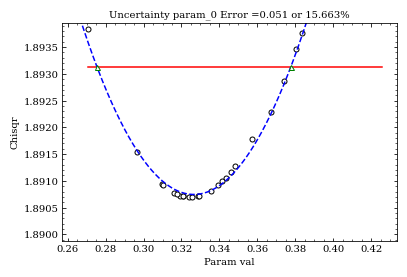

[                                        ]  1/65 (  1%) 64 to go

Evaluating Uncertainty for param_1


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Insufficient number of points under max chisqr. Recursively iterating.
Good points: 17/20


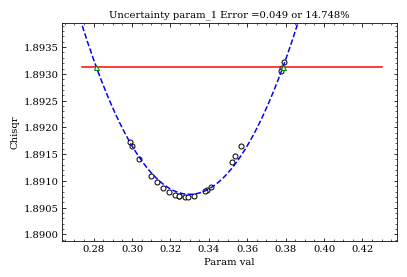

[=                                       ]  2/65 (  3%) 63 to go

Evaluating Uncertainty for param_2


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Insufficient number of points under max chisqr. Recursively iterating.
Good points: 18/20


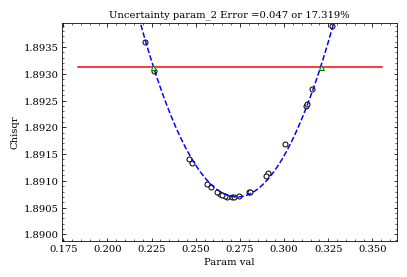

[=                                       ]  3/65 (  4%) 62 to go

Evaluating Uncertainty for param_3


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


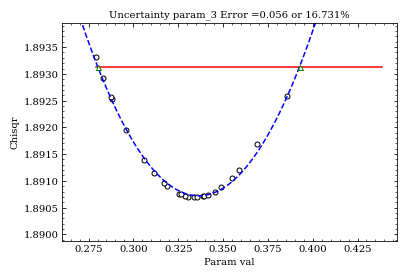

[==                                      ]  4/65 (  6%) 61 to go

Evaluating Uncertainty for param_4


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Insufficient number of points under max chisqr. Recursively iterating.
Good points: 18/20


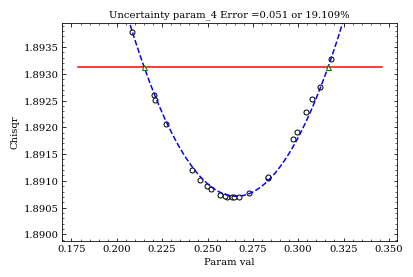

[===                                     ]  5/65 (  7%) 60 to go

Evaluating Uncertainty for param_5


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


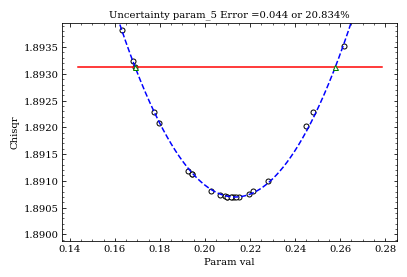

[===                                     ]  6/65 (  9%) 59 to go

Evaluating Uncertainty for param_6


Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


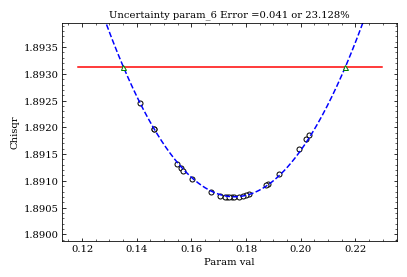

[====                                    ]  7/65 ( 10%) 58 to go

Evaluating Uncertainty for param_7


In [ ]:
#This is the measurement that we will factorize and perform a simple analysis for.
factorresult = hlio_seq.factorization(qe_limits=[0.4,2.0,1.8,12.0],g_factor=2.0,fast_mode=False,
                                      mag_ion='Ir4', filename='hlio_example_errors.npy',
                                      overwrite_prev=True)

In [ ]:
#Note that this method returns the value of S(Q), which is independent of the magnetic form factor.
from thpyutils.neutron.magAnalysis import getMagFF
FFsqr = getMagFF(factorresult[0],'Ir4')

fig,ax = plt.subplots(1,1)
#ax.errorbar(factorresult[0],factorresult[1],factorresult[2],color='r',mec='r')
ax.errorbar(factorresult[0],FFsqr*factorresult[1],FFsqr*factorresult[2],color='k')
ax.set_ylabel(r"$S(Q)|F(Q)|^2$ (b/sr/mol$\cdot$Ir)")
ax.set_xlabel(r"$Q$ ($\AA^{-1}$)")

fig,ax = plt.subplots(1,1)
#ax.errorbar(factorresult[0],factorresult[1],factorresult[2],color='r',mec='r')
ax.errorbar(factorresult[3],factorresult[4],factorresult[5],color='k')
ax.set_ylabel(r"$G(\omega)$ meV$^{-1}$")
ax.set_xlabel(r"$\hbar\omega$ (meV)")

